In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
%matplotlib inline

In [9]:
df = pd.read_parquet("data.parquet")
df

,U,Y
0,[1.2170722741467207e-07],[0.0]
1,[1.721186675596113e-07],[-6.081514333379378e-10]
2,[-4.046235534778108e-08],[-2.5979185836506197e-09]
3,[4.9072631411925917e-08],[-3.922280447659037e-09]
4,[-9.381589042259007e-08],[-2.503691558091396e-09]
...,...,...
7995,[1.1179591065147258e-08],[-1.3378653857894803e-09]
7996,[1.7376054438811373e-07],[-2.3653808832317113e-09]
7997,[9.612743852152209e-08],[-2.4217962346402988e-09]
7998,[-4.971505106306398e-09],[-3.216171632269875e-09]


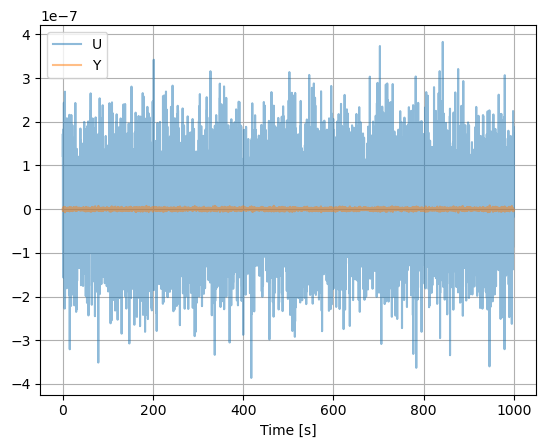

In [10]:
t = 1e3*np.arange(df.shape[0])/8000
u = np.vstack(df["U"])
y = np.vstack(df["Y"])
fig,ax = plt.subplots()
ax.plot(t,u,alpha=0.5,label="U")
ax.plot(t,y,alpha=0.5,label="Y")
ax.grid()
ax.set_xlabel('Time [s]')
ax.legend()

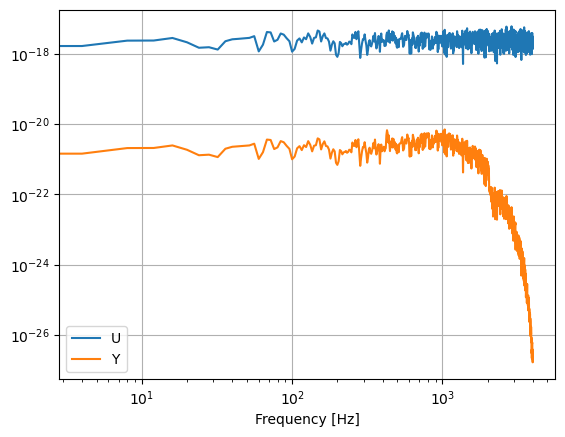

In [11]:
nu,psd_u = welch(u.flatten(),fs=8000, nperseg=1000*2)
nu,psd_y = welch(y.flatten(),fs=8000, nperseg=1000*2)
fig,ax = plt.subplots()
ax.loglog(nu,psd_u,label="U")
ax.loglog(nu,psd_y,label="Y")
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.legend()

Text(0, 0.5, 'PSD [dB]')

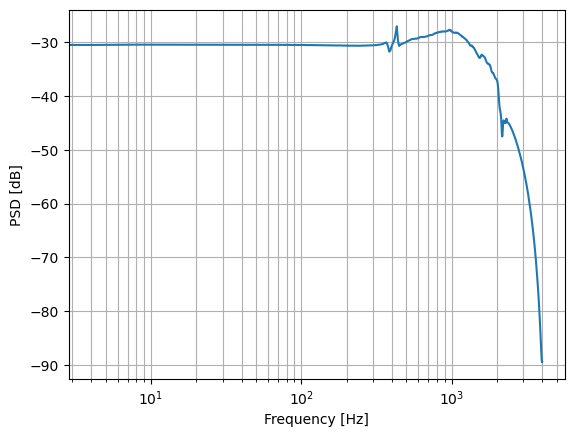

In [15]:
fig,ax = plt.subplots()
ax.semilogx(nu,10*np.log10(psd_y/psd_u))
ax.grid(which='both')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("PSD [dB]")
#ax.set_ylim([-20,10])

In [13]:
nu[1]

4.0

In [14]:
8000/2000

4.0